In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data Acquisition

In [ ]:
df = pd.read_csv('ev_sales.csv')
df.head()

In [ ]:
df['brand'].value_counts().head(10)

In [ ]:
# retrieve all the rows with the brand as Mercedes-Benz
mb = df[df['brand']=='Mercedes-Benz']
mb.head(10)

In [ ]:
mb['car_body_type'].value_counts()

In [ ]:
mb['top_speed_kmh'].value_counts()

In [ ]:
mb['drivetrain'].value_counts()

We have 42 Mercedes-Benz vehicles which is the most in our dataset. the top speed of 210 kmh with 22 vehicles

In [ ]:
colors=["#CA25A6", '#33FF57',"#7A1BC7", '#3357FF', '#F0F033', "#33FFFF",  "#41647A", "#193F3C"]

Data Analysis

Summarise the dataset

In [ ]:
df.info()

In [ ]:
df.describe()

Feature Selection

In [ ]:
feature=['brand', 'model', 'range_km', 'battery_capacity_kWh', 'fast_charging_power_kw_dc', 'car_body_type','top_speed_kmh', 'acceleration_0_100_s', 'number_of_cells', 'seats', 'efficiency_wh_per_km', 'torque_nm']
ev_df= df[feature]

In [ ]:
ev_df.head()

In [ ]:
ev_df.isnull().sum()

Top 10 high speed vehicles

In [ ]:
top_10_speed=ev_df.groupby('brand')['top_speed_kmh'].mean().sort_values(ascending=False).head(10)
top_10_speed

Top 10 brands with high efficiency

In [ ]:
top_10_efficiency=ev_df.groupby('brand')['efficiency_wh_per_km'].mean().sort_values(ascending=False).head(10)
top_10_efficiency

Top 10 highest-range vehicles

In [ ]:
top_10_range=ev_df.groupby('brand')['range_km'].mean().sort_values(ascending=False).head(10)
top_10_range

In [ ]:
# Normalize each column to 0-1 scale for comparison (min-max scaling)
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())


In [ ]:
norm_range= min_max_scale(top_10_range)
norm_efficiency= min_max_scale(top_10_efficiency)
norm_speed= min_max_scale(top_10_speed)

In [ ]:
# Plot stacked bar chart
fig, ax = plt.subplots(3,1,figsize=(10,8))
#Plot the normalized values
ax[0].bar(norm_range.index, norm_range.values, label='Range (normalized)',color='lightgreen')
ax[1].bar(norm_efficiency.index, norm_efficiency.values, label='Efficiency (normalized)',color='skyblue')
ax[2].bar(norm_speed.index, norm_speed.values, label='Speed (normalized)',color='yellow')
#Set the title
ax[0].set_title('Top 10 Brands by Average Range (normalized)')
ax[1].set_title('Top 10 Brands by Average Efficiency (normalized)')
ax[2].set_title('Top 10 Brands by Average Speed (normalized)')

#Set the x labels
ax[0].set_xlabel('Brand')
ax[1].set_xlabel('Brand')
ax[2].set_xlabel('Brand')

#set the y labels
ax[0].set_ylabel('Normalized Range')
ax[1].set_ylabel('Normalized Efficiency')
ax[2].set_ylabel('Normalized Speed')

# Rotate x-ticks for better readability
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[2].tick_params(axis='x', rotation=45)

# Add grid for better readability
ax[0].grid(linestyle='--', alpha=0.7)
ax[1].grid(linestyle='--', alpha=0.7)
ax[2].grid(linestyle='--', alpha=0.7)

# Add a legend to each subplot
ax[0].legend()
ax[1].legend()
ax[2].legend()

#Display the plot
plt.tight_layout()
plt.show()

Distribution of Top Speed in km/h

In [ ]:
ev_df['top_speed_kmh'].hist(bins=30, color="#7A1BC7", edgecolor='black')
plt.title('Distribution of Top Speed')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

Car Body Types Frequency Distribution

In [ ]:
ev_df['car_body_type'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Car Body Types Frequency Distribution')
plt.xlabel('Car Body Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('brand')['car_body_type'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
sedan_ev=ev_df[ev_df['car_body_type'] == 'Sedan']
suv_ev=ev_df[ev_df['car_body_type'] == 'SUV']
hatchback_ev=ev_df[ev_df['car_body_type'] == 'Hatchback']

In [ ]:
sedan_ev['brand'].value_counts()

In [ ]:
suv_ev['brand'].value_counts()

In [ ]:
hatchback_ev['brand'].value_counts()

The Hypothesis Test Would Be:

Null Hypothesis (H₀): There is no correlation between battery_capacity_kWh and range_km.

Alternative Hypothesis (H₁): There is a significant positive correlation between battery_capacity_kWh and range_km.

In [ ]:
df.isnull().sum()

the battery capacity and the range variables doesn't have any null values.

see if they are normally distributed

p > 0.05 → Data is likely normal

p ≤ 0.05 → Data is not normal

In [ ]:

stat, p = kstest(df['battery_capacity_kWh'], 'norm', args=(df['battery_capacity_kWh'].mean(), df['battery_capacity_kWh'].std()))
print(f"KS test p-value: {p:.4f}")

In [ ]:
stat, p = kstest(df['range_km'], 'norm', args=(df['range_km'].mean(), df['range_km'].std()))
print(f"KS test p-value: {p:.4f}")

In [ ]:
#  Calculate the Pearson correlation
corr_coef, p_value = pearsonr(df['battery_capacity_kWh'], df['range_km'])

print(f"Pearson Correlation Coefficient: {corr_coef:.2f}")
print(f"P-Value: {p_value:.2e}")

Interpretation:

🔋 There's a very strong positive correlation between battery capacity and range. 
📉 The p-value is far below 0.05, so we reject the null hypothesis.

Conclusion:
As battery capacity (in kWh) increases, the driving range (in km) increases significantly — which makes intuitive sense and is statistically supported.

In [ ]:
# Step 3: Plot the scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='battery_capacity_kWh', y='range_km', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
#plt.scatter(df['battery_capacity_kWh'], df['range_km'], alpha=0.5, color='blue', label='Data Points')
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.grid(True)
#plt.legend()
plt.tight_layout()
plt.show()

Output:
You'll get the correlation coefficient and p-value in the console.

The plot will show a regression line indicating the linear relationship.

Are SUVs faster compared to hatchbacks?

Does top speed correlate strongly with acceleration?

K-Means Clustering based on range_km, battery_capacity_kWh, efficiency_wh_per_km, acceleration_0_100_s

In [ ]:
attr=['range_km','battery_capacity_kWh','efficiency_wh_per_km','acceleration_0_100_s','top_speed_kmh','torque_nm']
X=df[attr].dropna()

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
# Apply kmeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_scaled)

from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")

Best number of clusters: 2 with a silhouette score of 0.41


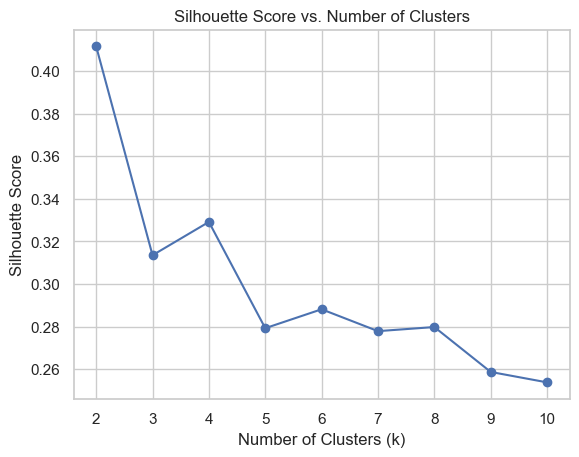

In [221]:
scores = []
models = []

ks = range(2, 11)

for k in ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    models.append(model)

#get the model with the highest silhouette score
best_k = ks[scores.index(max(scores))]
print(f"Best number of clusters: {best_k} with a silhouette score of {max(scores):.2f}")

# Plot
plt.plot(ks, scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


best_model=models[scores.index(max(scores))]
# Add the cluster labels back to your data
X['cluster'] = best_model.labels_
X['cluster'] = X['cluster'].astype(str)

Interpretation: Best k = 2 (Silhouette ~ 0.40)
A silhouette score over 0.40 indicates moderately distinct clusters.

Since this is the peak value, and scores drop afterward, it means the structure in your EV data is best explained by just 2 major groups.


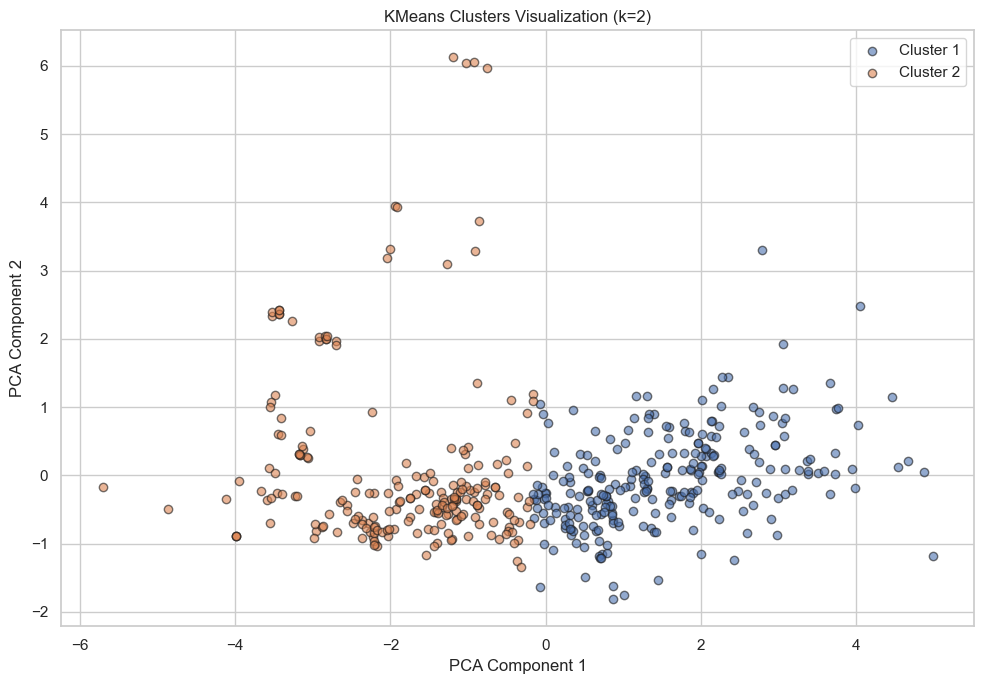

In [222]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
labels = best_model.predict(X_scaled)
n_clusters = best_model.n_clusters

plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}', alpha=0.6, edgecolor='k')

plt.title(f'KMeans Clusters Visualization (k={n_clusters})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**The data probably separates into two broad categories, such as:**

*High-performance or premium EVs*

->Large battery

->high range

->fast acceleration

->higher speed

*Economy or practical EVs*

->Smaller battery

->more efficient

->lower top speed

->slower acceleration

To validate this, let's analyze feature averages for each cluster.

In [223]:
# feature average of each cluster
cluster_means = pd.DataFrame(X_scaled, columns=attr).groupby(labels).mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
   range_km  battery_capacity_kWh  efficiency_wh_per_km  acceleration_0_100_s  \
0  0.701070              0.707700              0.160815             -0.656405   
1 -0.841939             -0.849901             -0.193129              0.788300   

   top_speed_kmh  torque_nm  
0       0.652263   0.698419  
1      -0.783326  -0.838756  


In [ ]:
colors=["#CA25A6", '#33FF57',"#7A1BC7", '#3357FF', '#F0F033', "#33FFFF",  "#41647A", "#193F3C"]

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_21100\2780192684.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Features')


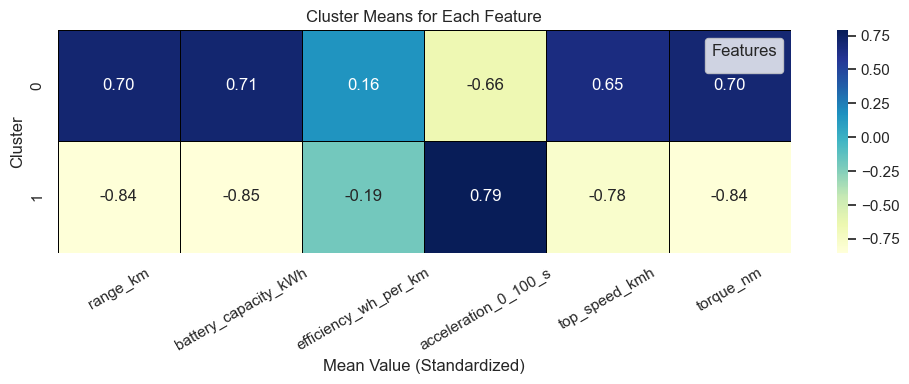

In [224]:
#plot cluster means
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, linecolor='black',cbar=True)
plt.title('Cluster Means for Each Feature')
plt.ylabel('Cluster')
plt.xlabel('Mean Value (Standardized)')
plt.xticks(rotation=30)
plt.legend(title='Features')
plt.tight_layout()
plt.show()